In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [185]:

url = "https://drive.google.com/uc?id=1-ho9_iDENO4eNh8J7CkmiJBQ10cq5lS3"
df = pd.read_csv(url)
df=pd.DataFrame(df)
df

,Year,Revenue (₹ Cr),EBIT (₹ Cr),Net Income (₹ Cr),Depreciation & Amortization (₹ Cr),CapEx (₹ Cr),Δ Working Capital (₹ Cr),Net Debt (₹ Cr)
0,2021,96638,35747,5927,12800,1640,-34829,56424
1,2022,110304,44737,6976,13900,1700,-67902,58742
2,2023,121000,54761,8952,16800,2240,-42541,87807
3,2024,199000,76238,117915,23500,3470,201319,50200
4,2025,273000,96242,140530,30900,4290,-1748,385000


In [186]:
g=3.5
years=5
ebit_margin=25
tax_rate=26
WACC=10.5
DnA_per=3
capex_per=0.5
del_nwc_per=0.5
outstanding_shares=2546748882
net_debt=df['Net Debt (₹ Cr)'][4]


In [187]:
##growth rate-cagr
## for short term use 10 to 14 percent
## for long therm use 2 to4 %
## can also take the cagr from the dataset



In [188]:
#ASSUMPTIONS:
#Growth Rate (FY26–FY30) is 14% per year
#EBIT Margin	is 22.2%
#Tax Rate	is 26.5%
##D&A as % of Revenue is	3%
#CapEx as % of Revenue is 1.7%
#Change in NWC as % of Revenue IS 3%

In [189]:
## Revenue_t​=Revenue_t−1×(1+Growth Rate)
##i have taken growth rate to be 7.6%
revenue=[]
years=5
rev_prev=df["Revenue (₹ Cr)"][4]
print(rev_prev)
i=0
for i in range(years):

  rev_new = rev_prev * (1 + g/100)
  revenue.append(rev_new)
  rev_prev = rev_new

revenue=pd.Series(revenue)
revenue

273000


,0
0,282555.000000
1,292444.425000
2,302679.979875
3,313273.779171
4,324238.361442


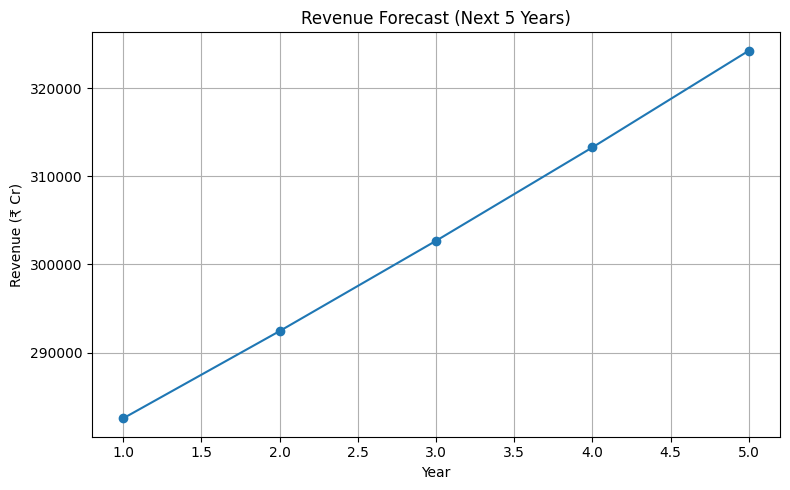

In [190]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), revenue, marker='o')
plt.title("Revenue Forecast (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Revenue (₹ Cr)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [191]:
#EBIT FORECAST
#EBIT= Revenue*EBIT_margin

In [192]:
#EBIT=Revenue×Ebit_Margin%
#NOPAT=EBIT×(1-tax_rate%)
#D&A=Revenue×27.4%
#CapEx=Revenue×1.7%
#ΔNWC=Revenue×3%
#FCF=NOPAT+D&A-CapEx-ΔNWC

In [193]:
#EBIT:

EBIT=revenue*(ebit_margin/100)
EBIT=pd.Series(EBIT)
EBIT

,0
0,70638.750000
1,73111.106250
2,75669.994969
3,78318.444793
4,81059.590360


In [194]:
#NOPAT=EBIT*(1-tax_rate/100)

NOPAT=EBIT*(1-tax_rate/100)
NOPAT

,0
0,52272.675000
1,54102.218625
2,55995.796277
3,57955.649147
4,59984.096867


In [195]:
#D&A=Revenue*(3/100)
DnA=revenue*(DnA_per)/100
DnA

,0
0,8476.650000
1,8773.332750
2,9080.399396
3,9398.213375
4,9727.150843


In [196]:
#CapEx=Revenue*17/100
CapEx=revenue*(capex_per)/100
CapEx

,0
0,1412.775000
1,1462.222125
2,1513.399899
3,1566.368896
4,1621.191807


In [197]:
#ΔNWC=Revenue*1/100
change_NWC=revenue*(del_nwc_per)/100
change_NWC

,0
0,1412.775000
1,1462.222125
2,1513.399899
3,1566.368896
4,1621.191807


In [198]:
#FCF=NOPAT+D&A-CapEx-ΔNWC
FCF=NOPAT+DnA-change_NWC-CapEx
FCF

,0
0,57923.775000
1,59951.107125
2,62049.395874
3,64221.124730
4,66468.864096


In [199]:
# now,i will discount these fcfs using WACC(Weighted average cost of capital)(i will take it as 11.51 % as it is what i got from google)
# now ill calculate terminal value, enterprise value then adjust them for net debt  and get intrinsic value per share

In [200]:
# discounted fcf_t=fcf_t*discount_factor where discount_factor=(1/(1+wacc))^t

disc_FCF=[]
for i in range(years):
  disc_FCF.append(FCF[i]/(1+WACC/100)**(i+1))

disc_FCF=pd.Series(disc_FCF)
disc_FCF

,0
0,52419.705882
1,49099.000532
2,45988.656607
3,43075.348044
4,40346.592964


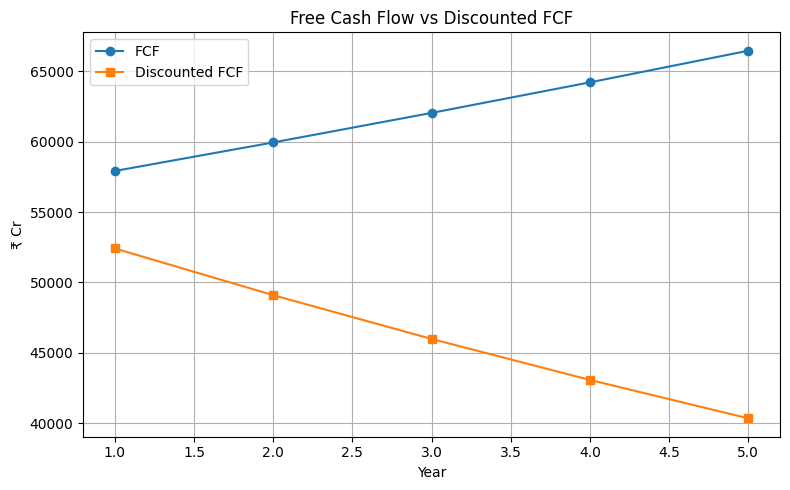

In [201]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), FCF, label='FCF', marker='o')
plt.plot(range(1, years + 1), disc_FCF, label='Discounted FCF', marker='s')
plt.title("Free Cash Flow vs Discounted FCF")
plt.xlabel("Year")
plt.ylabel("₹ Cr")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [202]:
data_pred=pd.DataFrame(
    {"revenue":revenue,
     "EBIT":EBIT,
     "NOPAT":NOPAT,
     "D&A":DnA,
     "CapEx":CapEx,
     "ΔNWC":change_NWC,
     "FCF":FCF,
     "disc_FCF":disc_FCF
     }
    )
data_pred

,revenue,EBIT,NOPAT,D&A,CapEx,ΔNWC,FCF,disc_FCF
0,282555.000000,70638.750000,52272.675000,8476.650000,1412.775000,1412.775000,57923.775000,52419.705882
1,292444.425000,73111.106250,54102.218625,8773.332750,1462.222125,1462.222125,59951.107125,49099.000532
2,302679.979875,75669.994969,55995.796277,9080.399396,1513.399899,1513.399899,62049.395874,45988.656607
3,313273.779171,78318.444793,57955.649147,9398.213375,1566.368896,1566.368896,64221.124730,43075.348044
4,324238.361442,81059.590360,59984.096867,9727.150843,1621.191807,1621.191807,66468.864096,40346.592964


In [203]:
# Terminal_val=FCF_end*(1+g)/(WACC-G)
terminal_val=FCF[years-1]*(1+g/100)/(WACC/100-g/100)
discounted_terminal_val=terminal_val*(1/(1+WACC/100)**years)
discounted_terminal_val

np.float64(596553.1959700725)

In [204]:
#Enterprise value is the sum of all discounted cash flows and the discounted terminal value
sum=0.0
for _ in range(years):
  sum+=disc_FCF[_]
enterprise_val=sum+discounted_terminal_val
enterprise_val

np.float64(827482.4999999998)

In [205]:
# to get the equity value,subtract the debt from enterprise value

equity_val=enterprise_val-net_debt
equity_val

np.float64(442482.49999999977)

In [206]:
#now to find intrinsic value of the shares , divide total equity by the total number of outstanding shares

intrinsic_val=equity_val*1e7/outstanding_shares
intrinsic_val

np.float64(1737.4406370702386)

In [207]:
#If DCF Intrinsic Value>Market Price→The stock is undervalued

#If DCF Intrinsic Value<Market Price→The stock is overvalued